In [3]:
# AERA protocol specifies constant non-CO2 past 2100.
# Modify the extension template to get this
# Note that to be read by f90nml, these files need to be modified to use
# CLIM_FCG_YEARS(:,1)=
# rather than
# CLIM_FCG_YEARS(1,1)=


import f90nml, numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [34]:
dir = Path('D:/Users/Martin/TEMP/')
nml = f90nml.read(dir / 'CNTLATM_ssp126_template_CMIP6')
years = np.array(nml['clmchfcg']['clim_fcg_years'])
gases = np.array(nml['clmchfcg']['clim_fcg_levls'])
nml_ext = f90nml.read(dir / 'CNTLATM_ssp126_ext_template_CMIP6')
years_ext = np.array(nml_ext['clmchfcg']['clim_fcg_years'])
gases_ext = np.array(nml_ext['clmchfcg']['clim_fcg_levls'])

c:\Users\Martin\miniconda3\envs\python310\lib\site-packages\f90nml\parser.py:827: UserWarning: f90nml: warning: Value -32768.0 is not assigned to any variable and has been removed.
  warnings.warn(


In [36]:
# Fortran version
f = open(dir / 'fcg_aera', 'w')
print('&CLMCHFCG', file=f)
print('L_CLMCHFCG=.TRUE.,', file=f)
for igas in [1,2,3,4,5,8,9,10,11]: 
    gas = np.zeros(486)
    gas[:86] = gases[igas-1,:-1]
    gas[86:] = gases[igas-1,-2]  # Repeat the 2000 value
    print('CLIM_FCG_NYEARS(%d)=486,' % igas, file=f)
    print('CLIM_FCG_YEARS(1,%d)=2015,2016,2017,2018,2019,2020,' % igas, file=f)
    y = 2021
    while y <= 2500:
        print(12*'%d,' % tuple(np.arange(y,y+12)), file=f)
        y += 12
    print('CLIM_FCG_LEVLS(1,%d)=%12.6e,%12.6e,%12.6e,%12.6e,' % 
           (igas, gas[0], gas[1], gas[2], gas[3]), file=f)
    i = 4
    while i+6 <= 486:
        print(6*'%12.6e,' % tuple(gas[i:i+6]), file=f)
        i += 6
    # Remaining elements
    nrem = 486 - i
    if nrem > 0:
        print(nrem*'%12.6e,' % tuple(gas[i:]), file=f)
    print('CLIM_FCG_RATES(%d,1)=486*-32768.0' % igas, file=f)
print('/', file=f)

f.close()
# Python version with (:)
f = open(dir / 'fcg_aerax', 'w')
print('&CLMCHFCG', file=f)
print('L_CLMCHFCG=.TRUE.,', file=f)
for igas in [1,2,3,4,5,8,9,10,11]: 
    gas = np.zeros(486)
    gas[:86] = gases[igas-1,:-1]
    gas[86:] = gases[igas-1,-2]  # Repeat the 2000 value
    print('CLIM_FCG_NYEARS(%d)=486,' % igas, file=f)
    print('CLIM_FCG_YEARS(:,%d)=2015,2016,2017,2018,2019,2020,' % igas, file=f)
    y = 2021
    while y <= 2500:
        print(12*'%d,' % tuple(np.arange(y,y+12)), file=f)
        y += 12
    print('CLIM_FCG_LEVLS(:,%d)=%12.6e,%12.6e,%12.6e,%12.6e,' % 
           (igas, gas[0], gas[1], gas[2], gas[3]), file=f)
    i = 4
    while i+6 <= 486:
        print(6*'%12.6e,' % tuple(gas[i:i+6]), file=f)
        i += 6
    # Remaining elements
    nrem = 486 - i
    if nrem > 0:
        print(nrem*'%12.6e,' % tuple(gas[i:]), file=f)
    print('CLIM_FCG_RATES(%d,1)=486*-32768.0' % igas, file=f)
print('/', file=f)
f.close()

In [27]:
nml_aera = f90nml.read(dir / 'fcg_aerax')
years_aera = np.array(nml_aera['clmchfcg']['clim_fcg_years'])
gases_aera = np.array(nml_aera['clmchfcg']['clim_fcg_levls'])

c:\Users\Martin\miniconda3\envs\python310\lib\site-packages\f90nml\parser.py:827: UserWarning: f90nml: warning: Value -32768.0 is not assigned to any variable and has been removed.
  warnings.warn(


In [28]:
len(gases_aera)

11

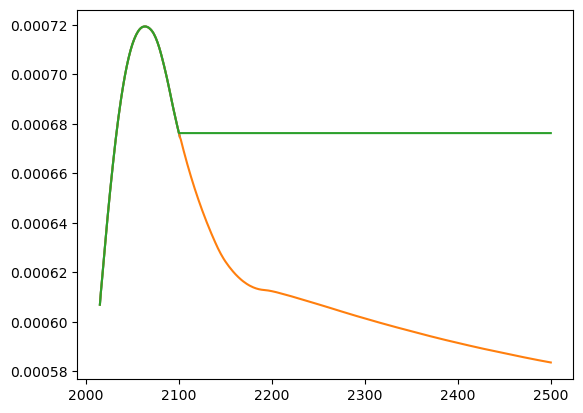

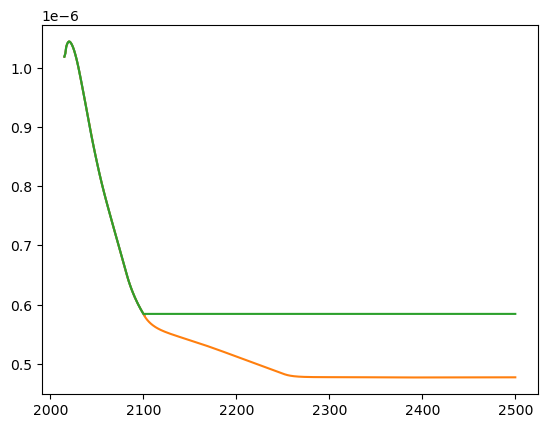

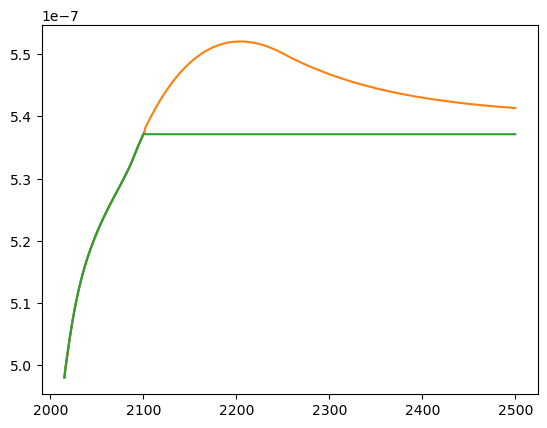

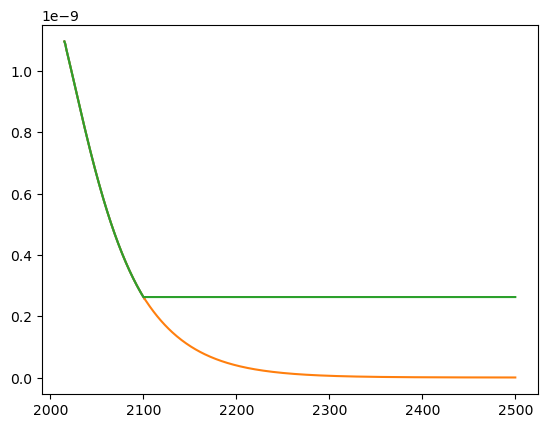

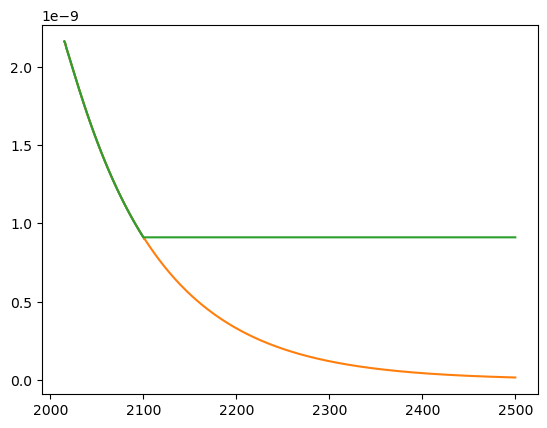

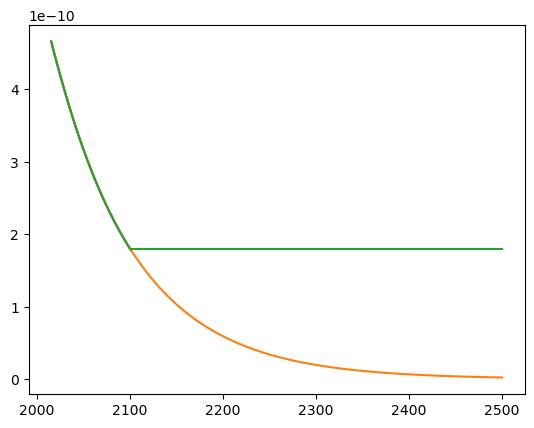

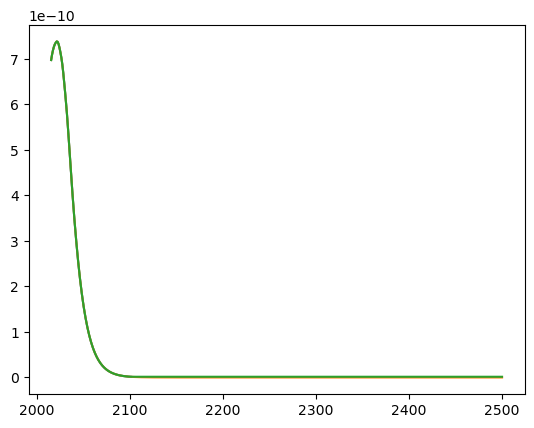

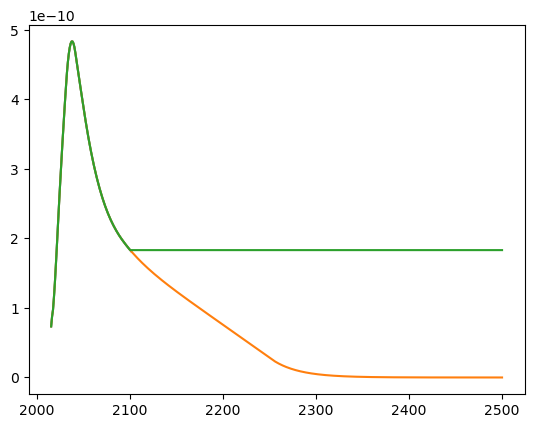

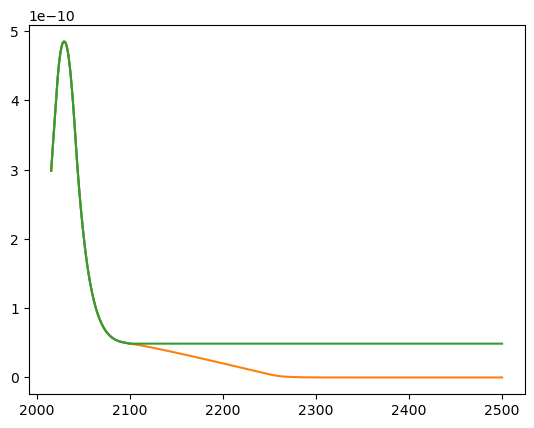

In [35]:
for igas in [1,2,3,4,5,8,9,10,11]: 
    fig, axes = plt.subplots()
    ig = igas - 1
    plt.plot(years[ig], gases[ig])
    plt.plot(years_ext[ig], gases_ext[ig])
    plt.plot(years_aera[ig], gases_aera[ig])